In [1]:
import mne

raw = mne.io.read_raw_edf('SC4001E0-PSG.edf', preload = True)
raw

Extracting EDF parameters from C:\Users\OH\python\Laboratory\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 7949999  =      0.000 ... 79499.990 secs...


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>

In [2]:
print(raw.ch_names)

['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [3]:
print(raw.info['sfreq'])

100.0


In [4]:
raw.filter(0.3, 45)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.3 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 1101 samples (11.010 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.0s finished


<RawEDF | SC4001E0-PSG.edf, 7 x 7950000 (79500.0 s), ~424.6 MB, data loaded>

In [5]:
data = raw.get_data(units="uV")
print(data.shape)

(7, 7950000)


Extracting EDF parameters from C:\Users\OH\python\Laboratory\SC4001E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


C:\Users\OH\AppData\Local\Temp\ipykernel_17552\2780193356.py:12: RuntimeWarning: The unit for channel(s) EMG submental, Event marker, Resp oro-nasal, Temp rectal has changed from V to NA.
  raw_train.set_channel_types(mapping)


Using matplotlib as 2D backend.


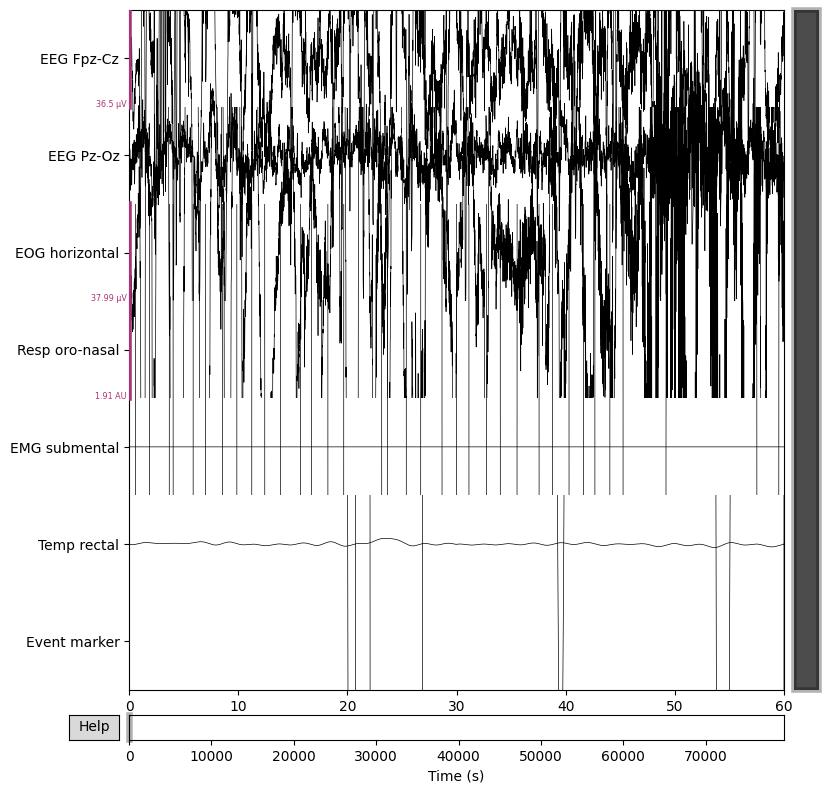

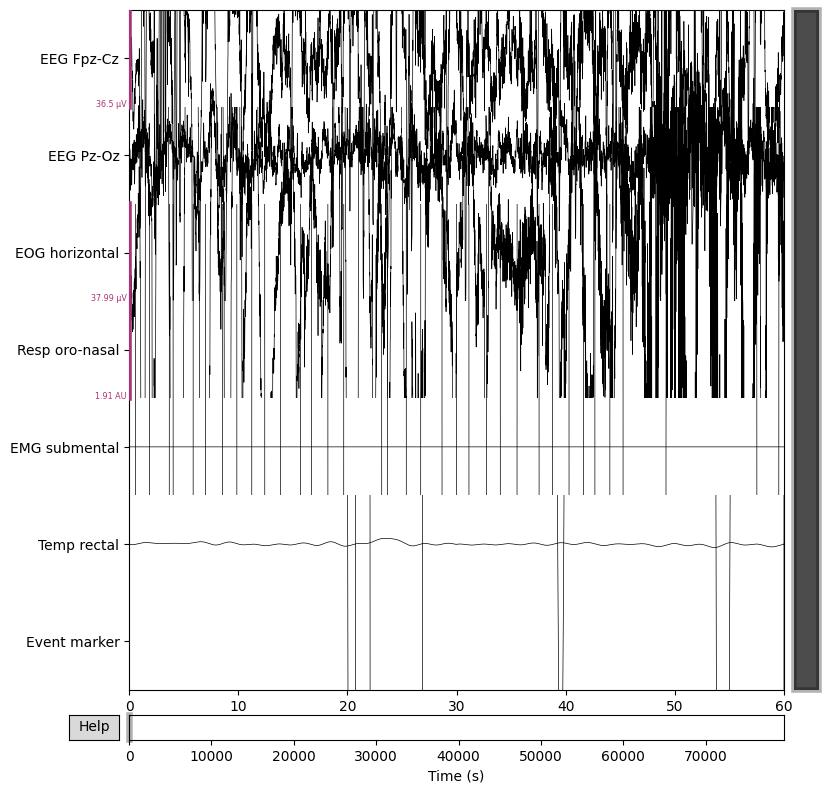

In [6]:
mapping = {'EOG horizontal': 'eog',
           'Resp oro-nasal': 'misc',
           'EMG submental': 'misc',
           'Temp rectal': 'misc',
           'Event marker': 'misc'}

raw_train = mne.io.read_raw_edf('SC4001E0-PSG.edf')
annot_train = mne.read_annotations('SC4001E0-PSG.edf')


raw_train.set_annotations(annot_train, emit_warning=False)
raw_train.set_channel_types(mapping)

# plot some data
raw_train.plot(duration=60, scalings='auto')